# Inferential Statistics

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5, 5)})

%matplotlib inline

## Uniform Distribution

In [2]:
from scipy.stats import uniform

In [3]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

In [4]:
data_uniform

array([20.40557515, 28.53470697, 24.76321489, ..., 24.57380293,
       18.17633607, 29.68750346])

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

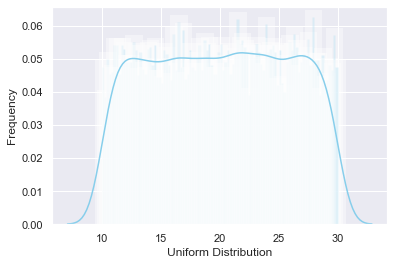

In [5]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )

ax.set(xlabel='Uniform Distribution',
      ylabel='Frequency')

## Normal Distribution

In [6]:
from scipy.stats import norm

In [7]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

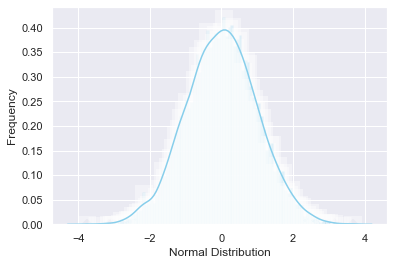

In [8]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )

ax.set(xlabel='Normal Distribution',
      ylabel='Frequency')

## Binomial Distribution

In [9]:
from scipy.stats import binom

In [10]:
data_binom = binom.rvs(n=10, p=0.9, size=10000)

In [11]:
data_binom

array([10,  7,  9, ...,  9, 10,  9])

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

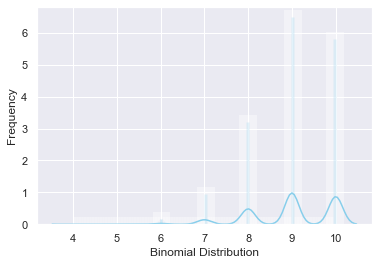

In [12]:
ax = sns.distplot(data_binom,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )

ax.set(xlabel='Binomial Distribution',
      ylabel='Frequency')

## Bernoulli DIstribution

In [13]:
from scipy.stats import bernoulli

In [14]:
data_bern = bernoulli.rvs(size=10000, p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

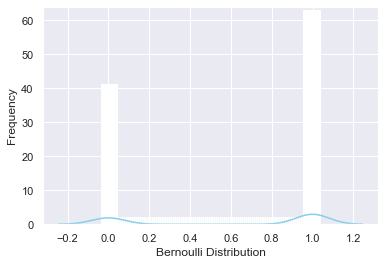

In [15]:
ax = sns.distplot(data_bern,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15, 'alpha':1}
                 )

ax.set(xlabel='Bernoulli Distribution',
      ylabel='Frequency')

## Confidence Interval

In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heart.csv')

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.groupby('sex').agg({'chol':[np.mean, np.std, np.size]})

chol                
           mean        std size
sex                            
0    261.455128  64.466781  312
1    239.237027  43.155535  713

In [20]:
mean = 261.455
sd = 64.4
n = 312
z = 1.96

In [21]:
se = sd / np.sqrt(n)

In [22]:
lo = mean - z * se
hi = mean + z * se

(lo ,hi)

(254.3089731821066, 268.60102681789334)

### Example 2

In [23]:
np.random.seed(42)
normal_distribution_us_male = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((normal_distribution_us_male, normal_distribution_us_female), axis=0)

df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


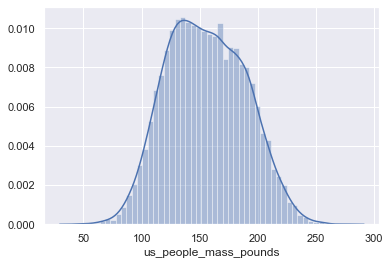

In [24]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'])

In [25]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

In [26]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

In [27]:
sample_means = []
n=25

for sample in range(0,300):
    sample_values = np.random.choice(a = df_ppl_mass['us_people_mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

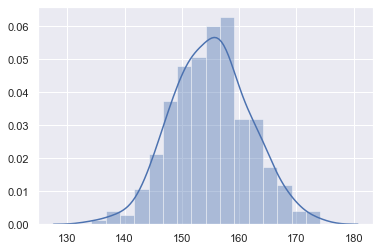

In [29]:
sns.distplot(sample_means)

## Hypothesis Testing